## **Modelos Predictivos Machine Learning: Supervisados de Regresión**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

*  Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos

<img src="https://d33wubrfki0l68.cloudfront.net/478f2689f1b9903ce2feed61a1f5e9c9deb2bcc9/55b03/post/commentary/inference-vs-prediction_files/figure-html/unnamed-chunk-1-1.png" width=500>

**Flujos de trabajo para inferencia y predicción**

Los flujos de trabajo básicos para la inferencia y la predicción se describen en las siguientes secciones.

**Inferencia**
* Modelado: Razonar sobre el proceso de generación de datos y elegir el modelo estocástico que mejor se aproxime al proceso de generación de datos.
* Validación del modelo: evalúe la validez del modelo estocástico mediante análisis de residuos o pruebas de bondad de ajuste.
* Inferencia: utilice el modelo estocástico para comprender el proceso de generación de datos.

**Predicción**

* Modelado: considere varios modelos diferentes y diferentes configuraciones de parámetros.
* Selección de modelo: identifique el modelo con el mayor rendimiento predictivo utilizando conjuntos de validación / prueba; seleccione el modelo con el rendimiento más alto en el equipo de prueba.
* Predicción: aplique el modelo seleccionado en datos nuevos con la expectativa de que el modelo seleccionado también se generalice a los datos no vistos.

In [1]:
## Tratamiento de datos
import numpy as np
import pandas as pd
## Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

## Modelado y preparación
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.pipeline  import Pipeline 
from sklearn.compose import ColumnTransformer

import statsmodels.api as sms ## Modelos Estadistico

from scipy import stats # Para test estadiscos
from statsmodels.stats.weightstats import DescrStatsW
import time

## Modelos Lineal
from sklearn.linear_model import LinearRegression ## Machien Learning


from tqdm import tqdm

## Seleccionar features
from sklearn.feature_selection import SelectKBest # seleccionar mejores variables predictivas
from sklearn.impute import SimpleImputer # Imputacion simple, por mediana y moda
from sklearn.preprocessing import OneHotEncoder ## Variables Categoricas

## Funciones Propias
import utils 

## Evitar notación cientifica 

pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Insumos/BaseModelos.csv")

In [3]:
df.head()

,Unnamed: 0,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [4]:
CategoricasF=pd.read_excel("Insumos/CategoricasF_Regression.xlsx").Variable.tolist()
CategoricasM=pd.read_excel("Insumos/CategoricasMutualInformation.xlsx").Variable.tolist()
NumericasM=pd.read_excel("Insumos/NumericasMutualInformation.xlsx").Variable.tolist()
NumericasF=pd.read_excel("Insumos/NumericasF_Regression.xlsx").Variable.tolist()

# **Modelos Regresión**

## **1 Regresión Simple: Estadistico**

In [5]:
#df.isnull().sum()

In [6]:
X=df[["GrLivArea"]]#df[["OverallQual"]]
Y=df["SalePrice"].values

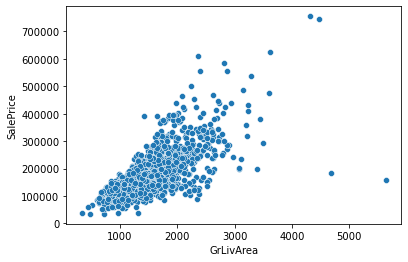

In [7]:
sns.scatterplot(data=df,x="GrLivArea",y="SalePrice");

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80)

In [9]:
x_train.shape

(1168, 1)

In [10]:
x_test.shape

(292, 1)

## **Enfoque Machine Learning: No Validamos Supuestos, Interesa Hacer Predicciones** 

In [11]:
Modelo_Sklearn= LinearRegression()
Modelo_Sklearn.fit(X=x_train,y=y_train)

LinearRegression()

* y=b0+b1X+e
* y = 21258.40+105AREA+e

* Interpretación 

* b0: 21648: El precio promedio de las vivienda en USA, es de 21684 cuando el area de construcción es cero
* B1: 104: El Precio de las Viviendas en USA, Aumentan en Promedio 105 Dolares aproximadamente, cuando se aumenta en un pie cuadrado el area construido, mantendiendo lo demas constante.

In [12]:
print("Intercepto B0 : ", Modelo_Sklearn.intercept_ )
print("COeficiente B1 : ", Modelo_Sklearn.coef_)

Intercepto B0 :  20604.80931888835
COeficiente B1 :  [105.55881474]


In [13]:
x_train.head()

,GrLivArea
515,2020.000
621,2614.000
653,1469.000
895,1796.000
466,1277.000


In [14]:
def prediccion_modelo_lineal(Area):
    prediccion= 21258.409685413266+105.1141588*Area # Modelo
    return prediccion

In [15]:
prediccion_modelo_lineal(816)

107031.56326621327

In [16]:
y_test[4]

127000.0

In [17]:
PrediccionesTest=Modelo_Sklearn.predict(x_test)
PrediccionesTest[:6]

array([104629.6258523 , 198999.20623029, 125741.3888004 , 141364.09338199,
       163637.00329223, 129541.50613106])

In [18]:
y_test[:6]

array([ 55000., 144000., 108000., 139950., 127000., 148000.])

## **Evaluar el Modelo**

**Error Train**

In [19]:
PrediccionesTrain=Modelo_Sklearn.predict(x_train)

**Root Mean Square Error (RMSE)**

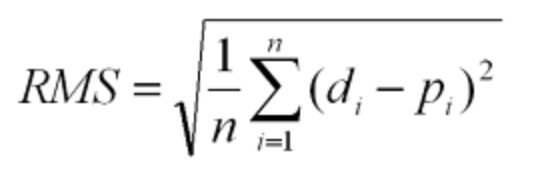

In [20]:
from sklearn.metrics import mean_absolute_error as MAE

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [21]:
Actual=y_train
Prediccion=PrediccionesTrain
MapeTrain1=MAPE(Actual,Prediccion)
print(MapeTrain1)
RMSETrain1=rmse(Actual,Prediccion)
print(RMSETrain1)
MaeTrain1=MAE(Actual,Prediccion)
print(MaeTrain1)

22.55998605754574
57172.68758295645
37938.14752510764


**Error Test**

In [22]:
Actual=y_test
Prediccion=PrediccionesTest
MapeTest1=MAPE(Actual,Prediccion)
print(MapeTest1)
RMSETest1=rmse(Actual,Prediccion)
print(RMSETest1)
MaeTest1=MAE(Actual,Prediccion)
print(MaeTest1)

22.258810604665253
51267.5019572051
36193.29461519026


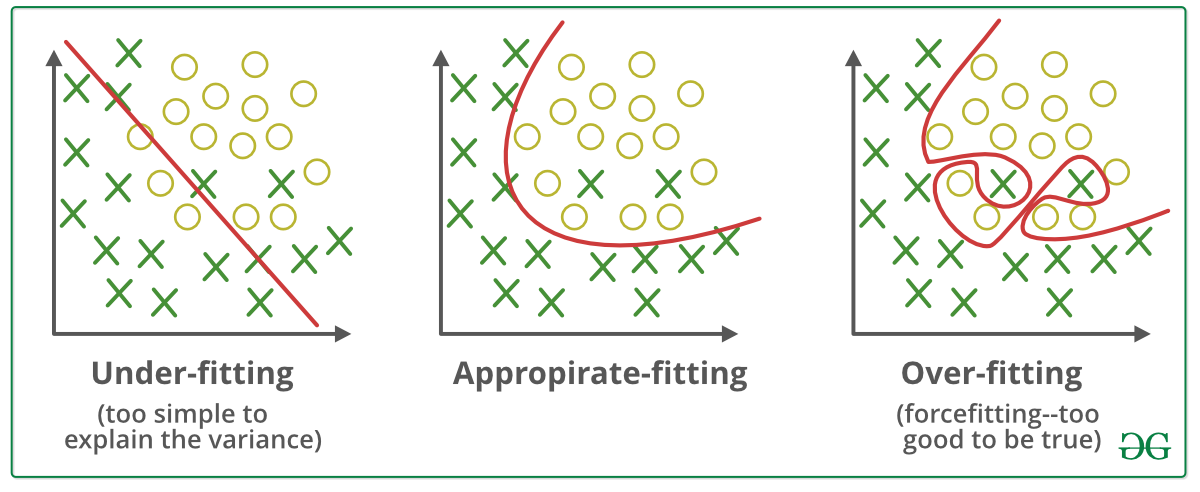
* Overfitting: Error Train < Error Test

Las causas del sobreajuste son los métodos no paramétricos y no lineales porque estos tipos de algoritmos de aprendizaje automático tienen más libertad para construir el modelo basado en el conjunto de datos y, por lo tanto, realmente pueden construir modelos poco realistas. Una solución para evitar el overfitting es usar un algoritmo lineal si tenemos datos lineales o usar parámetros como la profundidad máxima si estamos usando árboles de decisión.


Las causas del overfitting pueden ser complicadas. Generalmente, podemos categorizarlas en tres
tipos:

* Aprendizaje de ruido en el conjunto de entrenamiento: cuando el conjunto de entrenamiento es demasiado pequeño o tiene menos datos representativos o demasiados ruidos. Esta situación hace que los ruidos tengan grandes posibilidades de ser aprendidos, y luego actuar como base de predicciones. Por lo tanto, un algoritmo que funcione bien debería poder distinguir los datos representativos de los ruidos.

* Complejidad de la hipótesis: la compensación en complejidad, un concepto clave en el aprendizaje de la estadística y el mecanizado, es un compromiso entre Varianza y Sesgo. Eso se refiere a un equilibrio entre precisión y coherencia. Cuando los algoritmos tienen demasiadas hipótesis (demasiadas entradas), el modelo se vuelve más preciso en promedio con menor consistencia. Esta situación significa que los modelos pueden ser drásticamente diferentes en diferentes conjuntos de datos.

* Múltiples procedimientos de comparación que son omnipresentes en los algoritmos de inducción, así como en otros Algoritmos de inteligencia artificial. Durante estos procesos, siempre comparamos varios elementos en función de puntuaciones de una función de evaluación y seleccionamos el elemento con la puntuación máxima. Sin embargo, este proceso probablemente elegirá algunos elementos que no mejorarán o incluso reducirán la precisión de la clasificación.


* Underfiting: Error Train > Error Test

underfitting” es lo que ocurre cuando nuestro modelo es muy simplista, insuficiente para capturar los matices, particularidades y complejidades en los datos. 

He aquí algunas de las principales formas de combatir el underfitting:

* Usar modelos más complejos.

* Recolectar más data.

* Utilizar validación cruzada para aprovechar mejor los datos disponibles.

* Reducir la regularización, en caso de estarse usando.

* Eliminar “features” irrelevantes para mitigar “la maldición de la dimensionalidad”, la cual establece que, aproximadamente, por cada “feature” en nuestros datos, necesitaremos 10 veces más instancias de entrenamiento para poder ajustar un buen modelo.

* Modelo Adecuado: Error Train Similar Error Test
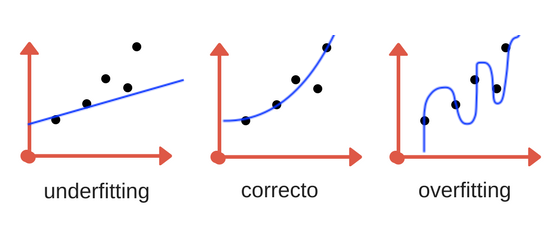

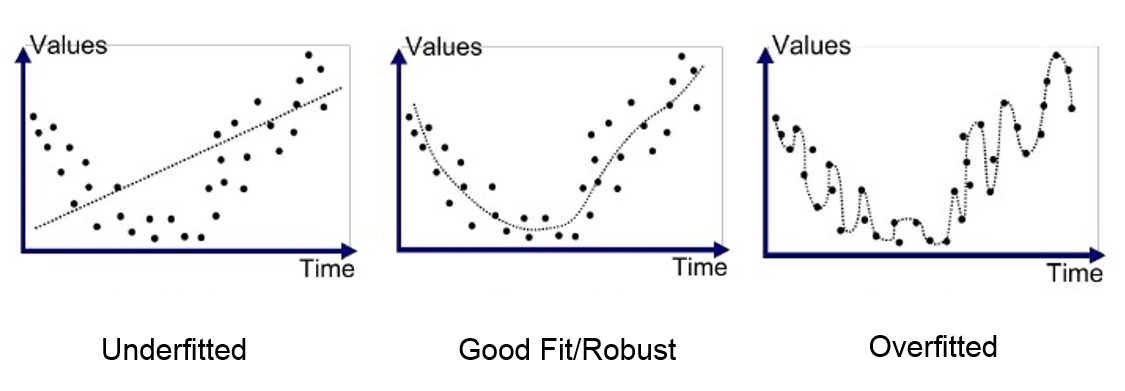

## **Mismo Modelo con Enfoque Estadistico**

In [23]:
import statsmodels.api as sms
import statsmodels.formula.api as smf
from statsmodels.iolib import summary2 ## Resumen del Model

In [24]:
## Se necesita agregar una columna de 1 a la matrix de X

(array([125., 578., 299., 102.,  37.,  17.,   4.,   3.,   2.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

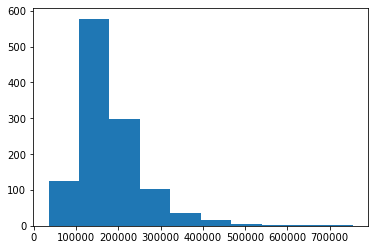

In [25]:
plt.hist(y_train)

In [26]:
x_train1=sms.add_constant(x_train,prepend=True)
x_test1=sms.add_constant(x_test,prepend=True)

In [27]:
ModeloLinealSimple_Statsmodel=sms.OLS(endog=y_train,exog=x_train1).fit()

In [28]:
ModeloLinealSimple_Statsmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.483     
Dependent Variable: y                AIC:                28906.7910
Date:               2023-03-18 11:09 BIC:                28916.9171
No. Observations:   1168             Log-Likelihood:     -14451.   
Df Model:           1                F-statistic:        1092.     
Df Residuals:       1166             Prob (F-statistic): 1.60e-169 
R-squared:          0.484            Scale:              3.2743e+09
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     20604.8093 5111.6350  4.0310 0.0001 10575.7783 30633.8404
GrLivArea   105.5588    3.1945 33.0434 0.0000    99.2911   111.8265
-------------------------------------------------------------------
Omnibus:             222.996       Durbin-Watson:          1.992   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3105.092
Skew:                0.442         Prob(JB):               0.000   
Kurtosis:            10.939        Condition No.:          4885    
===================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

* Interpretación 

* b0: 21648: El precio promedio de las vivienda en USA, es de 21684 cuando el area de construcción es cero
* B1: 104: El Precio de las Viviendas en USA, Aumentan en Promedio 105 Dolares aproximadamente, cuando se aumenta en un pie cuadrado el area construido, mantendiendo lo demas constante.
* R2= 50%; significa, que la variable Tamaño esplica, la variabilidad del precio de la casa en un 50%

In [29]:
ModeloLinealSimple_Statsmodel.conf_int(alpha=0.05)

,0,1
const,10575.778,30633.840
GrLivArea,99.291,111.827


**Validar supuesto de Normalidad de los residuales**

In [30]:
y_train

array([402861., 240000., 135000., ..., 140000., 140000., 257500.])

In [31]:
PrediccionesTrain= ModeloLinealSimple_Statsmodel.predict(exog=x_train1)

In [32]:
Residuales= y_train-PrediccionesTrain

In [33]:
Residuales

515    169027.385
621    -56535.551
653    -40670.708
895    -70188.441
466     11596.584
          ...    
685    -33722.732
1323   -12840.450
840    -37042.973
593     29881.316
673     42772.530
Length: 1168, dtype: float64

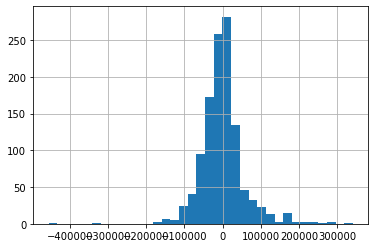

In [34]:
Residuales.hist(bins=35);

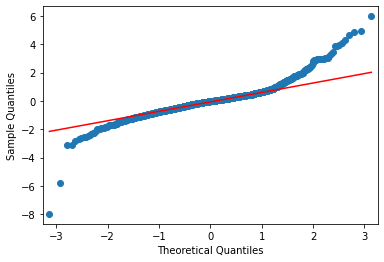

In [35]:
sms.qqplot(Residuales,fit=True,line="q");

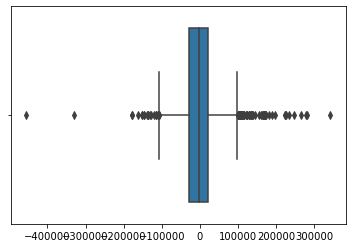

In [36]:
sns.boxplot(x=Residuales);

**Test de normalidad**

In [37]:
from scipy import stats # Para test estadiscos
shapiro_test = stats.shapiro(Residuales)
shapiro_test

ShapiroResult(statistic=0.8988389372825623, pvalue=4.631293366917708e-27)

In [38]:
k2, p_value = stats.normaltest(Residuales)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 222.99559550087665, p-value = 3.776780043516964e-49


In [39]:
# Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).

https://sites.google.com/site/curtiskephart/ta/econ113/interpreting-beta

## **Bootstrapping para calcular intervalos de confianza**

In [40]:
df.head()

,Unnamed: 0,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [41]:
datos=pd.concat([x_train1.drop(columns=["const"]).reset_index(drop=True),pd.DataFrame(y_train,columns=["PriceHouse"])],axis=1)
datos

,GrLivArea,PriceHouse
0,2020.000,402861.000
1,2614.000,240000.000
2,1469.000,135000.000
3,1796.000,140000.000
4,1277.000,167000.000
...,...,...
1163,2090.000,207500.000
1164,708.000,82500.000
1165,1482.000,140000.000
1166,848.000,140000.000


In [42]:
modelo = smf.ols(formula = 'PriceHouse ~ GrLivArea',
                 data    = datos)
modelo = modelo.fit()
print(modelo.params)

Intercept   20604.809
GrLivArea     105.559
dtype: float64


In [43]:
# Intervalos estimados por bootstrapping
# ==============================================================================

n_simulaciones = 5000
# 6 = 5 predictores + 1 intercept
coef_simulados = np.zeros(shape= (n_simulaciones, 2), dtype=float) 

for i in np.arange(n_simulaciones):
    datos_temp  = datos.sample(frac=1, replace=True)
    modelo_temp = smf.ols(
                    formula = 'PriceHouse ~ GrLivArea',
                    data    = datos_temp
                  )
    modelo_temp = modelo_temp.fit()
    coef_simulados[i, :] = modelo_temp.params
    
# Cálculo de los del intervalo por quantiles 0.05 y 0.975
intervalos_empiricos = np.quantile(coef_simulados, q = [.025, 0.975], axis=0)
intervalos_empiricos = pd.DataFrame(
                           data    = intervalos_empiricos,
                           index   = ['2.5%', '97.5%'],
                           columns = modelo.conf_int().index
                       )

print("Intervalos empíricos")
intervalos_empiricos

Intervalos empíricos


,Intercept,GrLivArea
2.5%,-1324.394,89.360
97.5%,43562.739,121.322


## **Regresión Robusta**

Cuando los errores no siguen una distribución normal, los resultados obtenidos por mínimos cuadrados se ven afectados, siendo mayor el impacto cuanto más largas son las colas. Una solución simple pasa por eliminar los valores atípicos (outliers) que forman dichas colas, sin embargo, de confirmarse que no son errores de lectura, el modelo debería incluirlos puesto que son parte del fenómeno que se quiere estudiar. Robust regression consigue reducir la influencia de los valores atípicos en el ajuste del modelo. Los dos tipos de robust regression más empleados son: M-Estimation y Least Trimmed Squares.

# **Modelo Regresión Multiple**

In [44]:
df.head()

,Unnamed: 0,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [45]:
VariblesPredictoras=NumericasF+CategoricasF
VariblesPredictoras

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'LotArea',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond',
 'GarageCars_3',
 'ExterQual_TA',
 'FullBath_1',
 'KitchenQual_TA',
 'GarageFinish_Unf',
 'BsmtQual_TA',
 'Foundation_PConc',
 'ExterQual_Gd',
 'BsmtFinType1_GLQ',
 'FullBath_2',
 'Neighborhood_NridgHt',
 'GarageCars_1',
 'MasVnrType_None',
 'SaleType_New',
 'GarageType_Detchd',
 'SaleCondition_Partial',
 'Fireplaces_1',
 'Foundation_CBlock',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 'KitchenQual_Gd',
 'BsmtExposure_No',
 'FullBath_3',
 'HeatingQC_TA',
 'BsmtExposure_Gd',
 'Exterior2nd_VinylSd',
 'Exterior1st_VinylSd',
 'HalfBath_1',
 'MSZoning_RM',
 'LotShape_Reg',
 'CentralAir_Y',
 'MSZoning_RL',
 'HouseStyle_2Story',
 'SaleType_WD',
 'Electrical_SBrkr',
 'RoofStyle_Hip',
 'GarageType_BuiltIn',
 '

In [46]:
X=df[VariblesPredictoras]
Y=df["SalePrice"].values

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80)

In [48]:
x1_train=sms.add_constant(x_train,prepend=True)
x1_test=sms.add_constant(x_test,prepend=True)
x1_train

,const,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea,BsmtUnfSF,BedroomAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,GarageCars_3,ExterQual_TA,FullBath_1,KitchenQual_TA,GarageFinish_Unf,BsmtQual_TA,Foundation_PConc,ExterQual_Gd,BsmtFinType1_GLQ,FullBath_2,Neighborhood_NridgHt,GarageCars_1,MasVnrType_None,SaleType_New,GarageType_Detchd,SaleCondition_Partial,Fireplaces_1,Foundation_CBlock,MasVnrType_Stone,Neighborhood_NoRidge,KitchenQual_Gd,BsmtExposure_No,FullBath_3,HeatingQC_TA,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd,HalfBath_1,MSZoning_RM,LotShape_Reg,CentralAir_Y,MSZoning_RL,HouseStyle_2Story,SaleType_WD,Electrical_SBrkr,RoofStyle_Hip,GarageType_BuiltIn,BsmtQual_Gd,GarageType_Attchd,PavedDrive_Y,RoofStyle_Gable,BsmtFullBath_1,Fireplaces_2,Neighborhood_StoneBr,MasVnrType_BrkFace,FireplaceQu_Gd,Neighborhood_OldTown,Neighborhood_NAmes,Neighborhood_Edwards,GarageFinish_RFn
964,1.000,1894.000,510.000,817.000,2002.000,2003.000,44.000,624.000,80.000,0.000,1070.000,40.000,11316.000,193.000,4.000,0.000,0.000,0.000,60.000,5.000,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0
19,1.000,1339.000,294.000,1029.000,1958.000,1965.000,0.000,504.000,70.000,0.000,0.000,0.000,7560.000,525.000,3.000,0.000,0.000,0.000,20.000,6.000,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0
618,1.000,1828.000,774.000,1822.000,2007.000,2007.000,452.000,48.000,90.000,0.000,0.000,108.000,11694.000,1774.000,3.000,0.000,260.000,0.000,20.000,5.000,1,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0
259,1.000,882.000,308.000,0.000,1956.000,1956.000,0.000,0.000,70.000,0.000,0.000,45.000,12702.000,0.000,2.000,0.000,0.000,0.000,20.000,5.000,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
1423,1.000,2201.000,432.000,697.000,1966.000,1966.000,0.000,0.000,69.000,586.000,626.000,236.000,19690.000,697.000,4.000,0.000,0.000,738.000,80.000,7.000,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,1.000,1234.000,484.000,1234.000,2007.000,2007.000,0.000,0.000,85.000,0.000,0.000,30.000,11049.000,1234.000,3.000,0.000,0.000,0.000,20.000,5.000,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1
475,1.000,970.000,624.000,970.000,1963.000,1963.000,0.000,630.000,80.000,0.000,0.000,24.000,8480.000,340.000,2.000,0.000,192.000,0.000,20.000,6.000,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1101,1.000,950.000,280.000,950.000,1971.000,1971.000,0.000,412.000,61.000,0.000,0.000,0.000,9758.000,251.000,3.000,0.000,0.000,0.000,20.000,5.000,0,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
81,1.000,1337.000,405.000,1237.000,1998.000,1998.000,443.000,1201.000,32.000,0.000,0.000,199.000,4500.000,36.000,2.000,0.000,0.000,0.000,120.000,5.000,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0


In [49]:
Modelo_Lineal_Multiple=sms.OLS(endog=y_train,exog=x1_train).fit()

In [50]:
Modelo_Lineal_Multiple.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.857     
Dependent Variable:        y                       AIC:                       27442.0261
Date:                      2023-03-18 11:09        BIC:                       27796.4395
No. Observations:          1168                    Log-Likelihood:            -13651.   
Df Model:                  69                      F-statistic:               102.5     
Df Residuals:              1098                    Prob (F-statistic):        0.00      
R-squared:                 0.866                   Scale:                     8.8310e+08
----------------------------------------------------------------------------------------
                         Coef.       Std.Err.     t    P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------------
const                 -920554.1063 189492.9339 -4.8580 0.0000 -1292363.2829 -548744.9297
GrLivArea                  47.2434      5.2680  8.9681 0.0000       36.9070      57.5798
GarageArea                  6.6318      7.2678  0.9125 0.3617       -7.6285      20.8920
TotalBsmtSF                10.0395      6.8929  1.4565 0.1455       -3.4852      23.5642
YearBuilt                 350.6620     81.1857  4.3193 0.0000      191.3654     509.9587
YearRemodAdd              143.2954     72.1855  1.9851 0.0474        1.6583     284.9325
MasVnrArea                  6.0034      7.8801  0.7618 0.4463       -9.4584      21.4653
BsmtFinSF1                 -2.2831      6.0245 -0.3790 0.7048      -14.1039       9.5376
LotFrontage              -158.9622     54.4106 -2.9215 0.0036     -265.7227     -52.2017
WoodDeckSF                  5.8884      7.9303  0.7425 0.4579       -9.6718      21.4486
2ndFlrSF                    4.6379      6.9092  0.6713 0.5022       -8.9187      18.1945
OpenPorchSF                -1.7690     15.6348 -0.1131 0.9099      -32.4464      28.9083
LotArea                     0.3333      0.0975  3.4177 0.0007        0.1420       0.5247
BsmtUnfSF                  -6.7700      6.1009 -1.1097 0.2674      -18.7407       5.2007
BedroomAbvGr             -958.1080   1615.0103 -0.5933 0.5531    -4126.9632    2210.7472
EnclosedPorch              26.2265     16.3721  1.6019 0.1095       -5.8976      58.3507
ScreenPorch                50.4322     16.5163  3.0535 0.0023       18.0252      82.8392
PoolArea                   -0.6557     22.8276 -0.0287 0.9771      -45.4464      44.1350
MSSubClass               -188.4169     27.7791 -6.7827 0.0000     -242.9229    -133.9108
OverallCond              7776.5057   1083.6462  7.1762 0.0000     5650.2543    9902.7572
GarageCars_3            28126.4967   4209.8827  6.6811 0.0000    19866.1728   36386.8206
ExterQual_TA           -10997.0010   5841.2046 -1.8827 0.0600   -22458.1854     464.1835
FullBath_1              21621.0482  11896.7062  1.8174 0.0694    -1721.7988   44963.8951
KitchenQual_TA         -18555.8203   4146.7656 -4.4748 0.0000   -26692.3005  -10419.3401
GarageFinish_Unf        -6173.5343   3143.2706 -1.9640 0.0498   -12341.0299      -6.0386
BsmtQual_TA            -17732.3080   4083.7181 -4.3422 0.0000   -25745.0809   -9719.5350
Foundation_PConc         4248.1525   4251.8055  0.9991 0.3179    -4094.4294   12590.7344
ExterQual_Gd            -3395.7495   5565.6819 -0.6101 0.5419   -14316.3235    7524.8244
BsmtFinType1_GLQ         8188.2443   2864.9642  2.8581 0.0043     2566.8211   13809.6674
FullBath_2              29100.7977  12140.5574  2.3970 0.0167     5279.4839   52922.1115
Neighborhood_NridgHt    40336.4710   5102.6912  7.9049 0.0000    30324.3435   50348.5986
GarageCars_1             -603.1130   2674.3223 -0.2255 0.8216    -5850.4726    4644.2467
MasVnrType_None         13262.1681   9170.3483  1.4462 0.1484   

**Interpretación**

In [51]:
(33/70)*100

47.14285714285714

**Revisar la Multicolinealidad**

**Analisis de Correlación Lineal entre las Variables Explicativas Numericas: esto se hace en el EDA**

**Metodo VIF Para Eliminar Variables que producen Multicolinealidad con Algo negocio**

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
x1=x_train

In [54]:
tabla_vif= pd.DataFrame()
tabla_vif["Variables"] = x1.columns
tabla_vif["VIF"]=[variance_inflation_factor(x1.values,i)
for i in range(len( x1.columns))]
Eliminar=tabla_vif[tabla_vif.VIF>10].sort_values("VIF", ascending=False).head(15).Variables.tolist()

In [55]:
len(Eliminar)

15

In [56]:
X_Train_New=x1_train.drop(columns=Eliminar,axis=True)
X_Test_New=x1_test.drop(columns=Eliminar,axis=True)

In [57]:
Modelo_Lineal_Multiple_VIF=sms.OLS(endog=y_train,exog=X_Train_New).fit()
Modelo_Lineal_Multiple_VIF.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                   OLS                   Adj. R-squared:          0.827     
Dependent Variable:      y                     AIC:                     27648.9194
Date:                    2023-03-18 11:09      BIC:                     27927.3870
No. Observations:        1168                  Log-Likelihood:          -13769.   
Df Model:                54                    F-statistic:             104.6     
Df Residuals:            1113                  Prob (F-statistic):      0.00      
R-squared:               0.835                 Scale:                   1.0671e+09
----------------------------------------------------------------------------------
                        Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
const                153236.0780 12018.1321 12.7504 0.0000 129655.3289 176816.8271
GarageArea               22.8588     7.5807  3.0154 0.0026      7.9847     37.7330
MasVnrArea                7.9474     6.7466  1.1780 0.2391     -5.2901     21.1850
BsmtFinSF1               24.6593     3.7305  6.6101 0.0000     17.3396     31.9790
LotFrontage            -143.8378    58.9667 -2.4393 0.0149   -259.5363    -28.1393
WoodDeckSF               17.1985     8.6342  1.9919 0.0466      0.2574     34.1396
2ndFlrSF                 44.0213     5.4859  8.0244 0.0000     33.2574     54.7852
OpenPorchSF              31.2334    16.9443  1.8433 0.0656     -2.0130     64.4799
LotArea                   0.3969     0.1051  3.7783 0.0002      0.1908      0.6030
BsmtUnfSF                19.9195     3.5389  5.6288 0.0000     12.9759     26.8632
BedroomAbvGr           4767.2865  1642.1639  2.9031 0.0038   1545.2005   7989.3725
EnclosedPorch            19.8065    17.4335  1.1361 0.2562    -14.3997     54.0127
ScreenPorch              47.1870    17.8788  2.6393 0.0084     12.1070     82.2670
PoolArea                 17.8806    24.7481  0.7225 0.4701    -30.6777     66.4388
MSSubClass             -194.9737    29.7258 -6.5591 0.0000   -253.2986   -136.6487
GarageCars_3          23881.8463  4555.1218  5.2429 0.0000  14944.2524  32819.4403
ExterQual_TA         -15900.5280  6362.6041 -2.4991 0.0126 -28384.5787  -3416.4772
KitchenQual_TA       -26439.0821  4468.4414 -5.9168 0.0000 -35206.6006 -17671.5636
GarageFinish_Unf     -10314.0897  3366.5679 -3.0637 0.0022 -16919.6249  -3708.5546
BsmtQual_TA          -23257.5337  4393.3401 -5.2938 0.0000 -31877.6960 -14637.3713
Foundation_PConc       4914.6733  4308.2941  1.1407 0.2542  -3538.6206  13367.9671
ExterQual_Gd          -3883.6034  6036.2630 -0.6434 0.5201 -15727.3410   7960.1343
BsmtFinType1_GLQ       9709.2282  3070.7753  3.1618 0.0016   3684.0671  15734.3893
Neighborhood_NridgHt  41609.9276  5527.2359  7.5282 0.0000  30764.9508  52454.9045
GarageCars_1          -5416.3461  2838.3818 -1.9083 0.0566 -10985.5285    152.8362
GarageType_Detchd     -2733.2942  2959.3159 -0.9236 0.3559  -8539.7610   3073.1726
Fireplaces_1          15496.5233  2776.4556  5.5814 0.0000  10048.8461  20944.2005
Foundation_CBlock      1385.0579  3903.1155  0.3549 0.7228  -6273.2360   9043.3518
MasVnrType_Stone       4207.0515  4034.2043  1.0428 0.2972  -3708.4514  12122.5545
Neighborhood_NoRidge  49816.0467  7089.6193  7.0266 0.0000  35905.5210  63726.5724
KitchenQual_Gd       -18427.2048  4366.0353 -4.2206 0.0000 -26993.7925  -9860.6170
BsmtExposure_No       -5259.6916  2570.5858 -2.0461 0.0410 -10303.4320   -215.9512
FullBath_3            48748.9236  7870.3220  6.1940 0.0000  33306.5830  64191.2643
HeatingQC_TA          -2599.8517  2532.8726 -1.0264 0.3049  -7569.5953   2369.8918
BsmtExposure_Gd       20503.3415  4053.2324  5.0585 0.0000  12550.5035  28456.1794
HalfBath_1             4315.3172  2913.9426  1.4809 0.1389  -1402.1228  1003

### **Errores Predicción**

In [58]:
PrediccionesTrain2=Modelo_Lineal_Multiple_VIF.predict(exog=X_Train_New)
PrediccionesTest2=Modelo_Lineal_Multiple_VIF.predict(exog=X_Test_New)

In [59]:
Actual=y_train
Prediccion=PrediccionesTrain2
MapeTrain2=MAPE(Actual,Prediccion)
print(MapeTrain2)
RMSETrain2=rmse(Actual,Prediccion)
print(RMSETrain2)
MaeTrain2=MAE(Actual,Prediccion)
print(MaeTrain2)

12.889120026934437
31887.917015344003
21069.867014280928


In [60]:
Actual=y_test
Prediccion=PrediccionesTest2
MapeTest2=MAPE(Actual,Prediccion)
print(MapeTest2)
RMSETest2=rmse(Actual,Prediccion)
print(RMSETest2)
MaeTest2=MAE(Actual,Prediccion)
print(MaeTest2)

14.872866198587639
34397.968844921816
23732.543786169612


<AxesSubplot:>

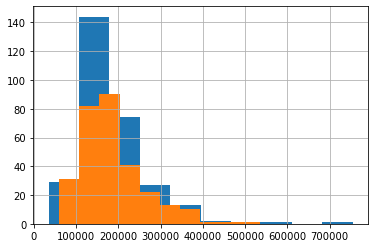

In [61]:
plt.hist(y_test)
PrediccionesTest2.hist()

## **Modelo Lineal Multiple Por Eliminación Automatica**

In [62]:
from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression()
sfs = SequentialFeatureSelector(model,direction='backward')
sfs.fit(x_train, y_train)
sfs.get_feature_names_out().tolist()
VariablesForward=sfs.get_feature_names_out().tolist()

In [63]:
x3_train=sms.add_constant(x_train[VariablesForward],prepend=True)
x3_test=sms.add_constant(x_test[VariablesForward],prepend=True)

In [64]:
Modelo_Lineal_Multiple_Aut=sms.OLS(endog=y_train,exog=x3_train).fit()
Modelo_Lineal_Multiple_Aut.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                     OLS                    Adj. R-squared:           0.849     
Dependent Variable:        y                      AIC:                      27473.2783
Date:                      2023-03-18 11:09       BIC:                      27650.4849
No. Observations:          1168                   Log-Likelihood:           -13702.   
Df Model:                  34                     F-statistic:              194.1     
Df Residuals:              1133                   Prob (F-statistic):       0.00      
R-squared:                 0.853                  Scale:                    9.3332e+08
--------------------------------------------------------------------------------------
                        Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
const                -481279.0007 131414.9465 -3.6623 0.0003 -739123.0081 -223434.9932
GrLivArea                 46.1382      2.8831 16.0029 0.0000      40.4814      51.7951
YearRemodAdd             292.3759     66.7618  4.3794 0.0000     161.3853     423.3666
ScreenPorch               39.3711     16.3773  2.4040 0.0164       7.2379      71.5042
MSSubClass              -208.7741     24.7879 -8.4224 0.0000    -257.4093    -160.1388
OverallCond             5394.1223    973.9553  5.5384 0.0000    3483.1636    7305.0809
GarageCars_3           34969.1269   3667.2634  9.5355 0.0000   27773.7361   42164.5176
ExterQual_TA          -11684.0843   3114.6291 -3.7514 0.0002  -17795.1733   -5572.9952
KitchenQual_TA        -21775.5358   3983.5874 -5.4663 0.0000  -29591.5732  -13959.4984
GarageFinish_Unf      -11064.6791   3053.7236 -3.6233 0.0003  -17056.2681   -5073.0902
BsmtQual_TA           -11680.9806   2655.9913 -4.3980 0.0000  -16892.1949   -6469.7663
BsmtFinType1_GLQ       10750.9539   2641.6177  4.0698 0.0001    5567.9416   15933.9663
FullBath_2             11043.5314   2906.2255  3.8000 0.0002    5341.3426   16745.7201
Neighborhood_NridgHt   49015.3340   4813.1420 10.1836 0.0000   39571.6607   58459.0072
GarageType_Detchd      14768.0095   4108.8017  3.5942 0.0003    6706.2942   22829.7248
Fireplaces_1           10093.6764   2188.5858  4.6120 0.0000    5799.5398   14387.8129
Neighborhood_NoRidge   46580.3355   6381.6000  7.2992 0.0000   34059.2535   59101.4176
KitchenQual_Gd        -21716.2654   3688.9208 -5.8869 0.0000  -28954.1492  -14478.3816
BsmtExposure_No        -6853.3702   2368.9070 -2.8931 0.0039  -11501.3078   -2205.4325
FullBath_3             53466.8776   7954.0913  6.7219 0.0000   37860.4733   69073.2820
BsmtExposure_Gd        23338.6001   3619.4231  6.4482 0.0000   16237.0749   30440.1253
HalfBath_1              6500.3426   2321.7293  2.7998 0.0052    1944.9704   11055.7147
MSZoning_RM           -16961.6553   4997.2621 -3.3942 0.0007  -26766.5833   -7156.7272
CentralAir_Y           10797.9872   4199.8749  2.5710 0.0103    2557.5807   19038.3937
MSZoning_RL            -9977.6528   4176.6701 -2.3889 0.0171  -18172.5300   -1782.7757
SaleType_WD           -10825.3506   2857.6997 -3.7881 0.0002  -16432.3288   -5218.3724
GarageType_Attchd      11894.0603   3511.4809  3.3872 0.0007    5004.3240   18783.7965
PavedDrive_Y           10452.8856   3668.0560  2.8497 0.0045    3255.9398   17649.8314
RoofStyle_Gable        -7946.1443   2332.1252 -3.4073 0.0007  -12521.9137   -3370.3748
BsmtFullBath_1         10609.6731   2147.2374  4.9411 0.0000    6396.6645   14822.6817
Fireplaces_2           36603.4286   3986.2786  9.1824 0.0000   28782.1110   44424.7463
Neighborhood_StoneBr   55082.8618   7280.9665  7.5653 0.0000   40797.1689   69368.5548
Neighborhood_OldTown  -12932.0133   4261.0038 -3.0350 0.0025  -21292.3582   -4571.6683
Neighborhood_Edwards  -19916.1994   3715.7122 -5.3600 0.0000  -2

In [65]:
PrediccionesTrain3=Modelo_Lineal_Multiple_Aut.predict(exog=x3_train)
PrediccionesTest3=Modelo_Lineal_Multiple_Aut.predict(exog=x3_test)

In [66]:
Actual=y_train
Prediccion=PrediccionesTrain3
MapeTrain3=MAPE(Actual,Prediccion)
print(MapeTrain3)
RMSETrain3=rmse(Actual,Prediccion)
print(RMSETrain3)

11.669869911968217
30089.05866221197


In [67]:
Actual=y_test
Prediccion=PrediccionesTest3
MapeTest3=MAPE(Actual,Prediccion)
print(MapeTest3)
RMSETest3=rmse(Actual,Prediccion)
print(RMSETest3)

14.13992433917226
33141.822833116275


<AxesSubplot:>

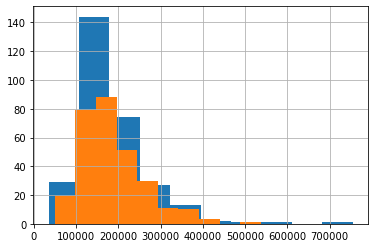

In [68]:
plt.hist(y_test)
PrediccionesTest3.hist()

## **Regularización Ridge, Lasso y Elastic Net**

### **Ridge: Tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero**

**Lasso: La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno.**

In [69]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV### Vamos a encontrar el mejor alpha que garantiza que no todas las variables se conviertan cero
from sklearn.linear_model import ElasticNetCV

In [70]:
#np.logspace(-10, 3, 50)

In [71]:
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 50),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = x_train, y = y_train)

In [72]:
x_train.shape

(1168, 69)

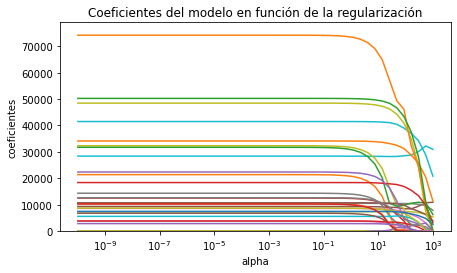

In [73]:
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(x_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

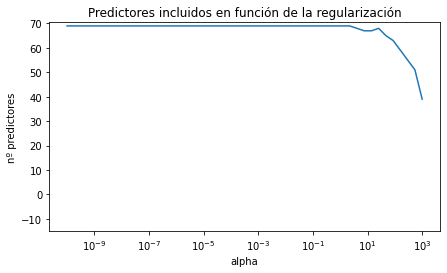

In [74]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(x_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

**Elección**

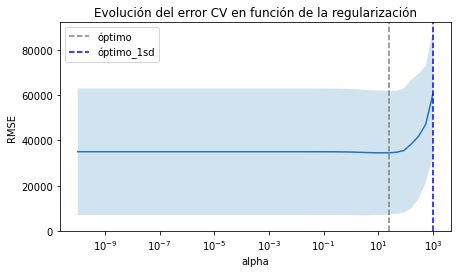

In [75]:
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [76]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 25.595479226995437


In [77]:
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo, normalize=True)
modelo.fit(x_train, y_train)

Lasso(alpha=25.595479226995437, normalize=True)

In [78]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,GrLivArea,48.258
1,GarageArea,9.567
2,TotalBsmtSF,6.289
3,YearBuilt,302.661
4,YearRemodAdd,177.193
5,MasVnrArea,6.289
6,BsmtFinSF1,4.646
7,LotFrontage,-51.728
8,WoodDeckSF,1.992
11,LotArea,0.239


In [79]:
PrediccionesTrain4=modelo.predict(x_train)
PrediccionesTest4=modelo.predict(x_test)

In [80]:
Actual=y_train
Prediccion=PrediccionesTrain4
MapeTrain4=MAPE(Actual,Prediccion)
print(MapeTrain4)
RMSETrain4=rmse(Actual,Prediccion)
print(RMSETrain4)

10.442159873360783
29808.146977859855


In [81]:
Actual=y_test
Prediccion=PrediccionesTest4
MapeTest4=MAPE(Actual,Prediccion)
print(MapeTest4)
RMSETest4=rmse(Actual,Prediccion)
print(RMSETest4)

12.31678646100794
31666.856949292778


# **Árbol de decisión**

In [82]:
## Arbol por defecto
from sklearn.tree import  DecisionTreeRegressor
from sklearn.tree import  plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

In [83]:
Modelo_AR=DecisionTreeRegressor(random_state=123) ## Instanciar el Modelo, por defecto no estamos controlando el tamaño
## Ajustar los datos
Modelo_AR=Modelo_AR.fit(x_train,y_train)

## **Gráficar el Arbol**

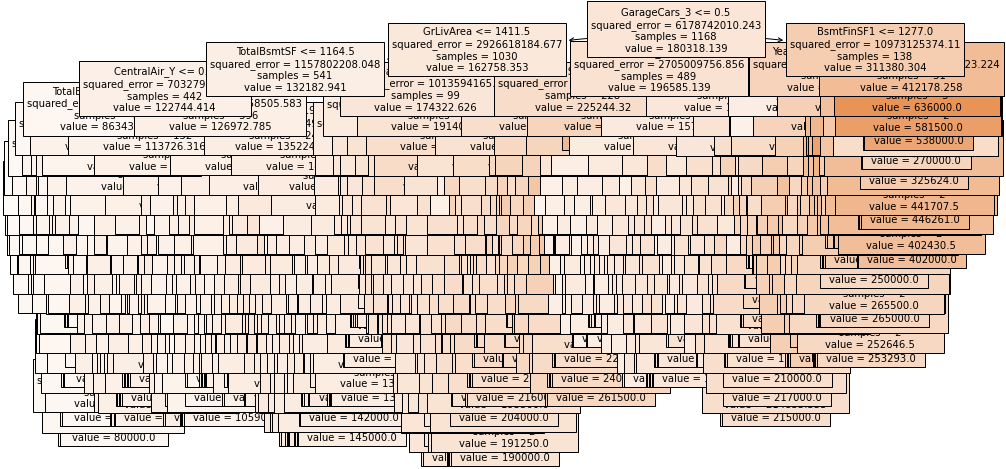

In [84]:
fig, ax = plt.subplots(figsize=(15, 8))
plot=plot_tree(decision_tree=Modelo_AR,
                feature_names=x_train.columns,
               class_names="SalePrice",
               filled        = True,
               fontsize      = 10)

## **Ranking Importancia de las Varibles**

In [85]:
Importancia_Variables= pd.DataFrame({"Predictor":x_train.columns,
                                     "Importancia": Modelo_AR.feature_importances_})

Importancia_Variables.sort_values("Importancia",ascending=False)

,Predictor,Importancia
19,GarageCars_3,0.372
0,GrLivArea,0.212
6,BsmtFinSF1,0.093
20,ExterQual_TA,0.049
2,TotalBsmtSF,0.049
4,YearRemodAdd,0.037
9,2ndFlrSF,0.026
11,LotArea,0.025
3,YearBuilt,0.022
1,GarageArea,0.014


* Los Arboles nos sirven como metodo para eliminar variables

## **Desventajas del Arbol**
* Sobreajuste: Los árboles de regresión tienden a sobreajustar los datos de entrenamiento, lo que significa que pueden tener un rendimiento deficiente cuando se aplican a nuevos datos. Esto puede ser especialmente problemático si los datos de entrenamiento son muy ruidosos o si el árbol se ha ajustado demasiado para los datos de entrenamiento específicos.

## **Error del Modelo**

In [86]:
PrediccionesTrain5=Modelo_AR.predict(x_train)
PrediccionesTest5=Modelo_AR.predict(x_test)

In [87]:
Actual=y_train
Prediccion=PrediccionesTrain5

MapeTrainAR=MAPE(Actual,Prediccion)
print(MapeTrainAR)
RMSETrainAR=rmse(Actual,Prediccion)
print(RMSETrainAR)

0.0
0.0


In [88]:
Actual=y_test
Prediccion=PrediccionesTest5
MapeTestAR=MAPE(Actual,Prediccion)
print(MapeTestAR)
RMSETestAR=rmse(Actual,Prediccion)
print(RMSETestAR)

16.421266883577868
45045.49321264612


## **La optimización de hiperparámetros: Podar el árbol**

Validación cruzada: La validación cruzada es una técnica común para optimizar los hiperparámetros de un árbol de regresión. Consiste en dividir los datos en un conjunto de entrenamiento y un conjunto de validación y ajustar el modelo en el conjunto de entrenamiento. Luego, se evalúa el rendimiento del modelo en el conjunto de validación y se repite este proceso varias veces con diferentes particiones de los datos. Se pueden ajustar diferentes valores de los hiperparámetros para encontrar la combinación óptima que maximice el rendimiento en el conjunto de validación.



In [89]:
params = {'max_depth': [2, 3, 4,5,6],
          'min_samples_split': [2, 4, 6, 8,10],
          'min_samples_leaf': [1, 2, 3, 4,6]}

regressor = DecisionTreeRegressor(random_state=123)

In [90]:
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=params,
                           cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 6],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [91]:
print('Mejores hiperparámetros:', grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [92]:
Modelo_AR_Opt=DecisionTreeRegressor(max_depth=6,min_samples_leaf=4,min_samples_split=2,random_state=123) ## Instanciar el Modelo, por defecto no estamos controlando el tamaño
## Ajustar los datos
Modelo_AR_Opt=Modelo_AR_Opt.fit(x_train,y_train)

In [93]:
x_train.shape

(1168, 69)

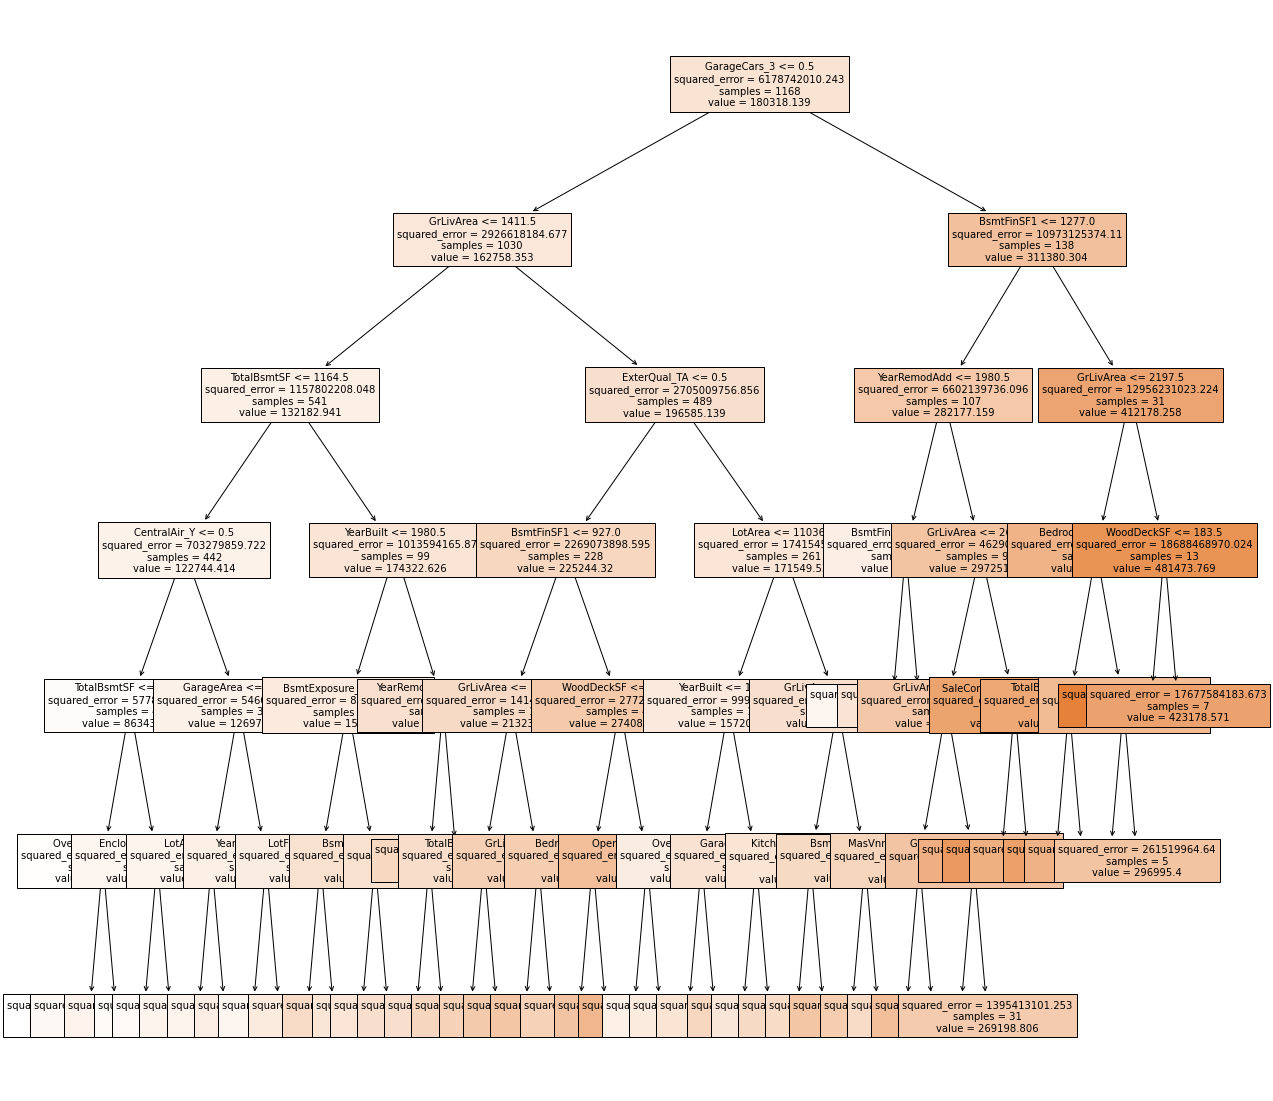

In [94]:
fig, ax = plt.subplots(figsize=(20, 20))
plot=plot_tree(decision_tree=Modelo_AR_Opt,
                feature_names=x_train.columns,
               class_names="SalePrice",
               filled        = True,
               fontsize      = 10)

In [95]:
from sklearn import tree
text_representation = tree.export_text(Modelo_AR_Opt)
print(text_representation)

|--- feature_19 <= 0.50
|   |--- feature_0 <= 1411.50
|   |   |--- feature_2 <= 1164.50
|   |   |   |--- feature_49 <= 0.50
|   |   |   |   |--- feature_2 <= 806.00
|   |   |   |   |   |--- feature_18 <= 6.50
|   |   |   |   |   |   |--- value: [73234.07]
|   |   |   |   |   |--- feature_18 >  6.50
|   |   |   |   |   |   |--- value: [101042.33]
|   |   |   |   |--- feature_2 >  806.00
|   |   |   |   |   |--- feature_14 <= 24.00
|   |   |   |   |   |   |--- value: [118500.00]
|   |   |   |   |   |--- feature_14 >  24.00
|   |   |   |   |   |   |--- value: [91750.00]
|   |   |   |--- feature_49 >  0.50
|   |   |   |   |--- feature_1 <= 298.00
|   |   |   |   |   |--- feature_11 <= 5950.00
|   |   |   |   |   |   |--- value: [95612.50]
|   |   |   |   |   |--- feature_11 >  5950.00
|   |   |   |   |   |   |--- value: [119764.25]
|   |   |   |   |--- feature_1 >  298.00
|   |   |   |   |   |--- feature_3 <= 1956.50
|   |   |   |   |   |   |--- value: [119986.79]
|   |   |   |   |   |--- 

## **Error**

In [96]:
PrediccionesTrain6=Modelo_AR_Opt.predict(x_train)
PrediccionesTest6=Modelo_AR_Opt.predict(x_test)

In [97]:
Actual=y_train
Prediccion=PrediccionesTrain6

MapeTrainAR1=MAPE(Actual,Prediccion)
print(MapeTrainAR1)
RMSETrainAR1=rmse(Actual,Prediccion)
print(RMSETrainAR1)

11.817053329717478
28713.180273191163


In [98]:
Actual=y_test
Prediccion=PrediccionesTest6
MapeTestAR1=MAPE(Actual,Prediccion)
print(MapeTestAR1)
RMSETestAR1=rmse(Actual,Prediccion)
print(RMSETestAR1)

16.976989199778824
41897.02297218191


## **RANDOM FOREST**

Un Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje supervisado de Machine Learning que se utiliza para la clasificación, regresión y otras tareas. Se basa en la combinación de múltiples árboles de decisión individuales para mejorar la precisión y prevenir el sobreajuste, que es cuando un modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.

Cada árbol de decisión en un Random Forest es construido de manera independiente utilizando un subconjunto aleatorio de los datos de entrenamiento. Durante el entrenamiento, cada árbol se ajusta a su propio subconjunto de datos. Cuando se utiliza el modelo para hacer predicciones, el resultado es una combinación de las predicciones de todos los árboles individuales. En el caso de la clasificación, se toma la clase que obtiene la mayoría de los votos de los árboles, mientras que en la regresión se promedian los resultados de todos los árboles.

El algoritmo de Random Forest es altamente eficiente y ofrece un buen rendimiento en muchas aplicaciones prácticas. Además, puede manejar grandes cantidades de datos, variables categóricas y numéricas, y es bastante resistente a los datos faltantes y al ruido.



**El entrenamiento de un Random Forest se realiza en varios pasos. A continuación, te describo detalladamente el proceso:**


1) Seleccionar el número de árboles (n_estimators): Primero, se decide cuántos árboles de decisión se van a construir en el bosque. Este número se denomina 'n_estimators' y es un hiperparámetro del algoritmo.

2) Bootstrapping: Para cada árbol, se crea un conjunto de datos de entrenamiento mediante muestreo aleatorio con reemplazo (técnica conocida como "bootstrapping") del conjunto de datos original. Cada subconjunto suele contener aproximadamente dos tercios de las observaciones originales, y las observaciones restantes se utilizan como conjunto de datos "out-of-bag" (OOB) para estimar la precisión de ese árbol individual.

3) Construcción del árbol de decisión: A continuación, se construye un árbol de decisión para cada subconjunto de datos utilizando el algoritmo de árbol de decisión. Sin embargo, en lugar de utilizar todas las características disponibles para determinar la mejor división en cada nodo, se selecciona un subconjunto aleatorio de características (determinado por el hiperparámetro 'max_features') y se elige la mejor división basada únicamente en ese subconjunto. Este proceso introduce una mayor diversidad en los árboles y hace que el bosque sea más robusto.


4) Repetir los pasos 2 y 3: Estos pasos se repiten para cada árbol de decisión en el bosque. Cada árbol se construye de forma independiente y no se poda, lo que significa que crece hasta que no se pueden hacer más divisiones o hasta que se alcanza un límite predefinido (como la profundidad máxima del árbol).

5) Agregación de las predicciones: Una vez que todos los árboles se han construido y entrenado, el bosque está listo para hacer predicciones. Cuando se presenta un nuevo ejemplo al modelo, cada árbol en el bosque emite una predicción. En el caso de la clasificación, la clase con más votos se selecciona como la predicción final. En el caso de la regresión, se promedian las predicciones de todos los árboles para obtener la predicción final.

Durante el entrenamiento, también es posible estimar la importancia de las características al observar qué características contribuyen más a la reducción de la impureza en los nodos del árbol. Esto puede ser útil para seleccionar características relevantes e interpretar el modelo.

En resumen, el entrenamiento de un Random Forest implica la construcción de múltiples árboles de decisión utilizando subconjuntos aleatorios de datos y características, y luego se combinan las predicciones de todos los árboles para obtener la predicción final del modelo.

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
PrediccionesTrain7=random_forest_regressor.predict(x_train)
PrediccionesTest7=random_forest_regressor.predict(x_test)

In [107]:
Actual=y_train
Prediccion=PrediccionesTrain7

MapeTrainRF1=MAPE(Actual,Prediccion)
print(MapeTrainRF1)
RMSETrainRF1=rmse(Actual,Prediccion)
print(RMSETrainRF1)

3.898299057262648
12011.070330278311


In [108]:
Actual=y_test
Prediccion=PrediccionesTest7
MapeTestRF1=MAPE(Actual,Prediccion)
print(MapeTestRF1)
RMSETestRF1=rmse(Actual,Prediccion)
print(RMSETestRF1)

11.71980727040232
30091.293652485674


In [114]:
from sklearn.model_selection import  GridSearchCV

In [115]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Realizar la búsqueda en grilla y entrenar el modelo con los mejores hiperparámetros encontrados
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [117]:
resultados = pd.DataFrame(grid_search.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
29,None,sqrt,1,2,200,0.825,0.047
57,None,log2,1,5,50,0.825,0.032
54,None,log2,1,2,50,0.824,0.034
39,None,sqrt,2,5,50,0.823,0.032


In [119]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_search.best_params_, ":", grid_search.best_score_, grid_search.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} : 0.8247879697644699 None


In [129]:
# Mostrar los mejores hiperparámetros encontrados
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [130]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid_search.best_estimator_

In [131]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,GrLivArea,0.095
2,TotalBsmtSF,0.088
19,GarageCars_3,0.079
20,ExterQual_TA,0.067
1,GarageArea,0.065
3,YearBuilt,0.064
6,BsmtFinSF1,0.049
21,FullBath_1,0.040
4,YearRemodAdd,0.033
9,2ndFlrSF,0.033


## **La importancia de las variables por permutación en un Random Forest**


La idea detrás de la importancia por permutación es evaluar cómo afecta el rendimiento del modelo al permutar aleatoriamente (cambiar el orden) de los valores de una característica en particular, manteniendo todas las demás características constantes. Si el rendimiento del modelo empeora significativamente al permutar los valores de una característica, eso indica que esa característica es importante para el modelo.

Para calcular la importancia por permutación en un Random Forest, sigue estos pasos:

1) Entrena un modelo de Random Forest utilizando el conjunto de datos de entrenamiento y evalúa su rendimiento en un conjunto de datos de validación o prueba utilizando una métrica adecuada (por ejemplo, precisión, error cuadrático medio, etc.).

2) Para cada característica en el conjunto de datos:
* a. Crea una copia del conjunto de datos de validación o prueba y permuta aleatoriamente los valores de la característica seleccionada.
* b. Utiliza el modelo entrenado para hacer predicciones en el conjunto de datos permutado y evalúa el rendimiento del modelo utilizando la misma métrica que en el paso 1.
* c. Calcula la diferencia en el rendimiento del modelo entre el conjunto de datos original y el conjunto de datos permutado. Esta diferencia representa la importancia de la característica.

3) Normaliza las diferencias en el rendimiento para obtener la importancia relativa de cada característica.


La importancia por permutación tiene algunas ventajas sobre otras métricas de importancia de características, como la importancia basada en la impureza en árboles de decisión. Por ejemplo, la importancia por permutación es menos propensa a sobreestimar la importancia de las características correlacionadas y puede aplicarse a modelos que no son árboles de decisión.

In [147]:
from sklearn.inspection import permutation_importance
import multiprocessing

importancia = permutation_importance(
                estimator    = modelo_final,
                X            = x_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = x_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,13496.040,381.224,GrLivArea
2,11122.014,321.413,TotalBsmtSF
19,7313.399,477.795,GarageCars_3
6,6378.923,198.215,BsmtFinSF1
1,6229.287,270.655,GarageArea
3,6225.351,237.683,YearBuilt
20,5855.091,480.630,ExterQual_TA
11,4714.963,148.292,LotArea
4,4462.447,247.328,YearRemodAdd
9,4206.810,88.964,2ndFlrSF


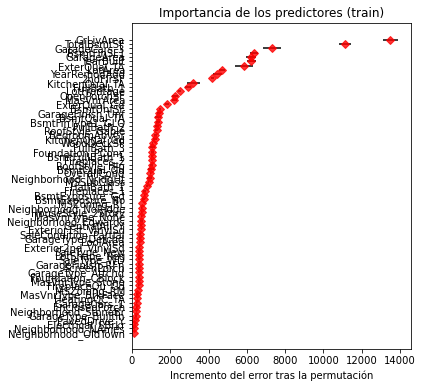

In [148]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

In [149]:
PrediccionesTrain8=modelo_final.predict(x_train)
PrediccionesTest8=modelo_final.predict(x_test)

In [150]:
Actual=y_train
Prediccion=PrediccionesTrain8

MapeTrainRF2=MAPE(Actual,Prediccion)
print(MapeTrainRF2)
RMSETrainRF2=rmse(Actual,Prediccion)
print(RMSETrainRF2)

3.950850668565141
12016.765961260358


In [151]:
Actual=y_test
Prediccion=PrediccionesTest8
MapeTestRF2=MAPE(Actual,Prediccion)
print(MapeTestRF2)
RMSETestRF2=rmse(Actual,Prediccion)
print(RMSETestRF2)

11.798809129744066
32317.796756588345


* Extrapolación con modelos Random Forest no es efectiva

Una límitación importante de los árboles de regresióna, y por lo tanto de Random Forest es que no extrapolan fuera del rango de entrenamiento. Cuando se aplica el modelo a una nueva observación, cuyo valor o valores de los predictores son superiores o inferiores a los observados en el entrenamiento, la predicción siempre es la media del nodo más cercano, independientemente de cuanto se aleje el valor. Vease el siguiente ejemplo en el que se entrenan dos modelos, un modelo lineal y un arbol de regresión, y luego se predicen valores de  𝑋
  fuera del rango de entrenamiento.

## **BOOSTING**

# **Evalución Modelos**

In [99]:
df_compararModelos=pd.DataFrame({
"Modelos":["RegresionSimple","RegresionMultiple","RegresionAut","RegresionLasso","Arbol Simple","Arbol Opt"],
"Mape_Train":[MapeTrain1,MapeTrain2,MapeTrain3,MapeTrain4,MapeTrainAR,MapeTrainAR1],
"RMSE_Train":[RMSETrain1,RMSETrain2,RMSETrain3,RMSETrain4,RMSETrainAR,RMSETrainAR1],
    "Mape_Test":[MapeTest1,MapeTest2,MapeTest3,MapeTest4,MapeTestAR,MapeTestAR1],
    "RMSE_Test":[RMSETest1,RMSETest2,RMSETest3,RMSETest4,RMSETestAR,RMSETestAR1]
})

In [100]:
df_compararModelos["Var%"]=(abs(df_compararModelos.RMSE_Test-df_compararModelos.RMSE_Train)/df_compararModelos.RMSE_Train)*100

In [101]:
df_compararModelos.sort_values("RMSE_Test",ascending=True)

,Modelos,Mape_Train,RMSE_Train,Mape_Test,RMSE_Test,Var%
3,RegresionLasso,10.442,29808.147,12.317,31666.857,6.236
2,RegresionAut,11.670,30089.059,14.140,33141.823,10.146
1,RegresionMultiple,12.889,31887.917,14.873,34397.969,7.871
5,Arbol Opt,11.817,28713.180,16.977,41897.023,45.916
4,Arbol Simple,0.000,0.000,16.421,45045.493,inf
0,RegresionSimple,22.560,57172.688,22.259,51267.502,10.329
